In [132]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [133]:
img = cv2.imread("./bird.jpg")

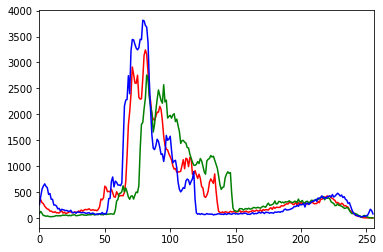

In [134]:
# Calculate histograms
hist_red = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([img], [1], None, [256], [0, 256])
hist_blue = cv2.calcHist([img], [2], None, [256], [0, 256])

plt.plot(hist_red, color='r')
plt.plot(hist_green, color='g')
plt.plot(hist_blue, color='b')
plt.xlim([0, 256])
plt.show()

In [135]:
def extract_color_threshold(image: np.ndarray, threshold: int):
    return np.where(image >= threshold, 255, 0)

In [136]:
def image_seuil_and(image  : np.ndarray, r , g , b ) :
    red_channel , green_channel , blue_channel = image[:,:,2],  image[:,:,1] , image[:,:,0]
    image_seuil_red = extract_color_threshold(red_channel , r)
    image_seuil_green = extract_color_threshold(green_channel , g)
    image_seuil_blue = extract_color_threshold(blue_channel , b)
    result = np.bitwise_and(image_seuil_red , image_seuil_green , image_seuil_blue)
    return result.astype('uint8')

In [137]:
def image_seuil_or(image  : np.ndarray, r , g , b ) :
    red_channel , green_channel , blue_channel = image[:,:,2],  image[:,:,1] , image[:,:,0]
    image_seuil_red = extract_color_threshold(red_channel , r)
    image_seuil_green = extract_color_threshold(green_channel , g)
    image_seuil_blue = extract_color_threshold(blue_channel , b)
    result = np.bitwise_or(image_seuil_red , image_seuil_green , image_seuil_blue)
    return result.astype('uint8')

In [138]:
def class_average(cl, start, end):
    niv = np.arange(start, end)
    return np.sum(cl * niv) / np.sum(cl)

def get_variance(hist, s):
    c0 = hist[:s]
    c1 = hist[s:]
    pc0 = np.sum(c0) / np.sum(hist)
    pc1 = np.sum(c1) / np.sum(hist)
    m = class_average(hist, 0, 255)
    m0 = class_average(c0, 0, s)
    m1 = class_average(c1, s, 255)
    return pc0 * (m0 - m)**2 + pc1 * (m1 - m)**2

def otsu_thresholding(hist):
    max_variance = 0
    seuil = 0
    for s in range(1, 254):
        variance = get_variance(hist, s)
        if variance > max_variance:
            max_variance = variance
            seuil = s
    return seuil

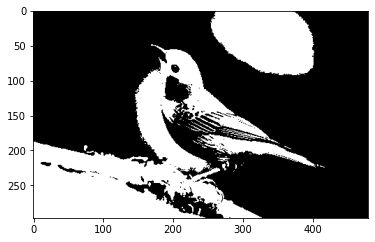

In [139]:
otsu_red , otsu_green , otsu_blue = otsu_thresholding(hist_red),otsu_thresholding(hist_green) , otsu_thresholding(hist_blue)


bird_binary_or = image_seuil_or(img , otsu_red , otsu_green , otsu_blue)
bird_binary_and = image_seuil_and(img , otsu_red , otsu_green , otsu_blue)


plt.imshow(bird_binary, cmap='gray', vmin=0, vmax=255)
plt.show()


In [140]:
gray_img = cv2.imread("./cat2.jpg", cv2.IMREAD_GRAYSCALE)
# binary_img = np.uint8(extract_color_threshold(gray_img, 160))
kernel = np.ones((5, 5), np.uint8)


In [141]:
def erosion(binary_image : np.ndarray , kernel : np.ndarray ):
  return cv2.erode(binary_image, kernel, iterations=1)

def dilatation(binary_img : np.ndarray , kernel : np.ndarray):
  return cv2.dilate(binary_img, kernel, iterations=1)

def fermeture(binary_image : np.ndarray , kernel : np.ndarray):
  return erosion(dilatation(binary_img , kernel))

def ouverture(binary_image : np.ndarray , kernel : np.ndarray):
  return dilatation(erosion(binary_img , kernel))

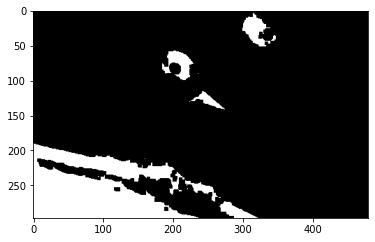

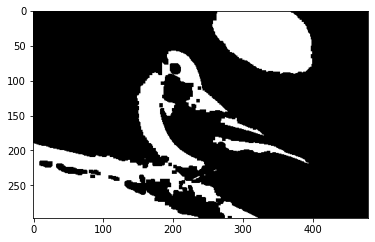

In [142]:
plt.imshow(erosion(bird_binary_and , kernel) , cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(erosion(bird_binary_or , kernel) , cmap='gray', vmin=0, vmax=255)
plt.show()